# ***Machine Learning Intro Assignment***

---



**Question 1: Explain the differences between AI, ML, Deep Learning (DL), and Data Science (DS)**.

**Answer 1:**

**Artificial Intelligence (AI):** The broad field of creating machines that can perform tasks requiring human intelligence (e.g., problem-solving, decision-making, speech recognition).

**Machine Learning (ML):** A subset of AI where systems learn patterns from data without being explicitly programmed (e.g., spam email detection).

**Deep Learning (DL):** A subset of ML using neural networks with multiple layers to model complex patterns (e.g., image recognition in self-driving cars).

**Data Science (DS):** A multidisciplinary field that uses AI/ML, statistics, and domain knowledge to extract insights from data (e.g., customer behavior analysis).

**Question 2: What are the types of machine learning? Describe each with one real-world example.**

**Answer 2:**

**Supervised Learning** – Model learns from labeled data.
Example: Predicting house prices using past data.

**Unsupervised Learning** – Model works with unlabeled data to find patterns.
Example: Customer segmentation in marketing.

**Reinforcement Learning *** **– Model learns by interacting with an environment and receiving rewards/penalties.
Example: Training a robot to walk.

**Question 3: Define overfitting, underfitting, and the bias-variance tradeoff in machine learning.**

**Answer 3:**

**Overfitting:** Model performs well on training data but poorly on unseen data because it memorized instead of generalizing.

**Underfitting:** Model is too simple and fails to capture data patterns.

**Bias-Variance Tradeoff:** Balancing model simplicity (bias) and flexibility (variance) to achieve good generalization.

**Question 4: What are outliers in a dataset, and list three common techniques for handling them.**

**Answer 4:**

**Outliers:** Data points significantly different from most of the dataset.

**Techniques to handle outliers:**

Remove them.

Transform data (e.g., log transformation).

Use robust methods (e.g., median instead of mean).

**Question 5: Explain the process of handling missing values and mention one imputation technique for numerical and one for categorical data.**

**Answer 5:**

**Process: Detect** → Analyze impact → Choose method → Apply imputation.

**Numerical Data**: Replace with mean/median.

**Categorical Data:** Replace with mode (most frequent value)

In [1]:
#Question 6: Write a Python program that:
# Creates a synthetic imbalanced dataset with make_classification() fromsklearn.datasets.
#Prints the class distribution.Question 6: Write a Python program that:
#Creates a synthetic imbalanced dataset with make_classification() from
#sklearn.datasets. Prints the class distribution.
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd

# Create dataset
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2,
                           weights=[0.9, 0.1], random_state=42)

# Print class distribution
unique, counts = np.unique(y, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))


Class distribution: {np.int64(0): np.int64(895), np.int64(1): np.int64(105)}


In [2]:
#Question 7: Implement one-hot encoding using pandas for the following list of colors:['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe.
import pandas as pd

colors = ['Red', 'Green', 'Blue', 'Green', 'Red']
df = pd.DataFrame(colors, columns=['Color'])

# One-hot encoding
encoded = pd.get_dummies(df, columns=['Color'])
print(encoded)


   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


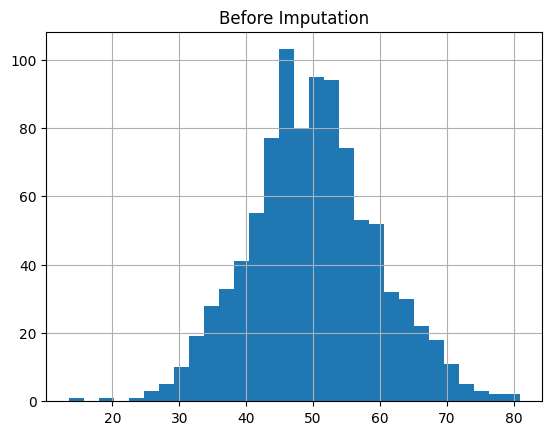

/tmp/ipython-input-3584501963.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Value'].fillna(df['Value'].mean(), inplace=True)


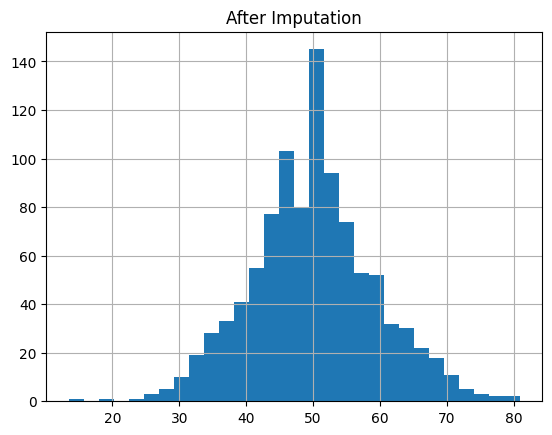

In [3]:
#Question 8: Write a Python script to:Generate 1000 samples from a normal distribution.Introduce 50 random missing values.Fill missing values with the column mean.Plot a histogram before and after imputation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate 1000 samples
data = np.random.normal(loc=50, scale=10, size=1000)
df = pd.DataFrame(data, columns=['Value'])

# Introduce 50 missing values
nan_indices = np.random.choice(df.index, 50, replace=False)
df.loc[nan_indices, 'Value'] = np.nan

# Plot before imputation
df['Value'].hist(bins=30)
plt.title("Before Imputation")
plt.show()

# Fill missing values with mean
df['Value'].fillna(df['Value'].mean(), inplace=True)

# Plot after imputation
df['Value'].hist(bins=30)
plt.title("After Imputation")
plt.show()


In [4]:
#Question 9: Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15,20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.array([[2], [5], [10], [15], [20]])
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
print(scaled)


[[0.        ]
 [0.16666667]
 [0.44444444]
 [0.72222222]
 [1.        ]]


In [9]:
#Question 10: You are working as a data scientist for a retail company. You receive a customertransaction dataset that contains:Missing ages,Outliers in transaction amount,A highly imbalanced target (fraud vs. non-fraud),Categorical variables like payment method.
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Example dataset
df = pd.DataFrame({
    'Age': [25, 30, None, 40, None],
    'Amount': [200, 30000, 250, 260, 50000],
    'Payment': ['Card', 'Cash', 'Card', 'UPI', 'Cash'],
    'Fraud': [0, 0, 0, 1, 0]
})

# Handle missing values
df['Age'] = SimpleImputer(strategy='median').fit_transform(df[['Age']])

# Handle outliers (cap at 95th percentile)
cap = df['Amount'].quantile(0.95)
df['Amount'] = df['Amount'].clip(upper=cap)

# One-hot encoding
df = pd.get_dummies(df, columns=['Payment'])

# Handle imbalance
X = df.drop('Fraud', axis=1)
y = df['Fraud']

# Check class balance first
print(y.value_counts())

if y.value_counts().min() < 2:
    # If only 1 fraud sample exists → use RandomOverSampler
    print("⚠️ Only 1 sample in minority class, using RandomOverSampler instead of SMOTE")
    X_res, y_res = RandomOverSampler(random_state=42).fit_resample(X, y)
else:
    # If more than 1 minority sample → SMOTE will work with lower k_neighbors
    X_res, y_res = SMOTE(k_neighbors=1, random_state=42).fit_resample(X, y)


print(X_res.head())
print(y_res.value_counts())



Fraud
0    4
1    1
Name: count, dtype: int64
⚠️ Only 1 sample in minority class, using RandomOverSampler instead of SMOTE
    Age  Amount  Payment_Card  Payment_Cash  Payment_UPI
0  25.0     200          True         False        False
1  30.0   30000         False          True        False
2  30.0     250          True         False        False
3  40.0     260         False         False         True
4  30.0   46000         False          True        False
Fraud
0    4
1    4
Name: count, dtype: int64
